Northeastern states seems to be doing better (1.Mizoram 2.Tripura 3.Nagaland )
                   Statewise_GDP_Growth
Mizoram                       17.700000
Tripura                       17.030000
Nagaland                      16.415000
Manipur                       14.610000
Arunachal Pradesh             14.413333
I'm from Kerala. Kerala have a growht percent of 12.58 its doing much better than the national average of 11.20



Bottom Five by GDP
                  State_GDP
Sikkim                16637
Arunachal Pradesh     18784
Puducherry            26533
Meghalaya             26745
Chandigarh            30304



Top Five by GDP
                   State_GDP
Tamil Nadu       1.21267e+06
Uttar Pradesh     1.1538e+06
Karnataka        1.02707e+06
Gujarat               994316
Andhra Pradesh        609934


<Figure size 4800x1280 with 0 Axes>

<Figure size 2400x1280 with 0 Axes>

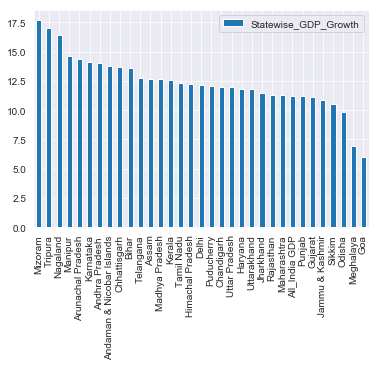

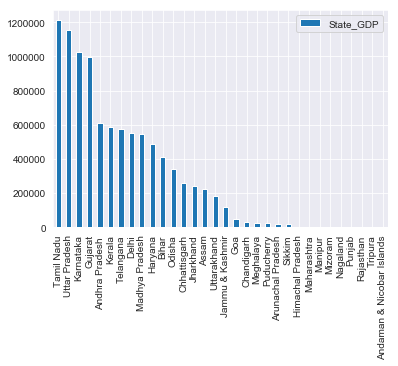

In [483]:
import pandas as pd
import numpy as np
import seaborn as sea
from matplotlib import pyplot as plt


#Reading the input
plt.figure(num = None, figsize = (60,16), dpi = 80, facecolor = 'w', edgecolor='k')

df =pd.read_csv('C://Users//Librarian//GitHub//Upgrad//Data-Science//Projects//GDP_Analysis/data_set_1_a.csv')
#deleting West Bengal data as there's no data
del df['West Bengal1']

#Data cleaning for removing unnecesary records
df_after_growth_removal = df[(df['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)') & (df['Duration'] != '2016-17')]
df_growth_percent = df[df['Items  Description'] == '(% Growth over previous year)']
df_growth_percent
df_mean_growth = df_growth_percent[(df_growth_percent['Duration']!='2012-13') & (df_growth_percent['Duration']!='2016-17')]

#Calculating the mean growth rate 
test = pd.DataFrame(df_mean_growth.mean())
test.columns =['Statewise_GDP_Growth']
test = test.sort_values(by = 'Statewise_GDP_Growth',ascending = False)
plt.figure(num = None, figsize = (30,16), dpi = 80, facecolor = 'w', edgecolor='k')
test.plot(kind = 'bar')


print("Northeastern states seems to be doing better (1.Mizoram 2.Tripura 3.Nagaland )")
print(test[:5])
print("I'm from Kerala. Kerala have a growht percent of 12.58 its doing much better than the national average of 11.20")

gdp_2015 = df[(df['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)') & (df['Duration'] == '2015-16')]
a_t = pd.DataFrame(gdp_2015.transpose())
a_t = a_t[2:]

a_t = a_t[a_t.index != 'All_India GDP']
a_t.columns = ['State_GDP']
a_t = a_t.sort_values(by = 'State_GDP',ascending = False)
a_t.plot(kind = 'bar')

## Top and Bottom 5 calculation of State GDP
print("\n\n")
print("Bottom Five by GDP")
print(a_t.sort_values(by = 'State_GDP')[0:5])
print("\n\n")
print("Top Five by GDP")
print(a_t.sort_values(by = 'State_GDP',ascending = False)[0:5])


In [484]:
import pandas as pd
import glob as gb

result = pd.DataFrame()
path = "C://Users//Librarian//GitHub//Upgrad//Data-Science//Projects//GDP_Analysis//New Folder//Backup//*.csv"

#Code for reading the files for different states - and we are assigning state name to records - Have wrote the code for my 
#system path. If used on different system tweak the code to read the correct state name
for filename in gb.glob(path):
    #print(filename)
    state = filename.split("-")[2]
    #print(state)
    df = pd.read_csv(filename,encoding = "ISO-8859-1")
    df = df[['S.No.', 'Item','2014-15']]
    df['State'] = state
    result = result.append(df)

result = result[(result['State']!='Delhi') & (result['State']!='Chandigarh')&(result['State']!='Puducherry')]




Top and Bottom 5 are: -
          State  GDP_2014_2015
32          Goa       271793.0
32       Sikkim       240274.0
32      Haryana       164077.0
32       Kerala       154778.0
32  Uttarakhand       153076.0



            State  GDP_2014_2015
32      Jharkhand        62091.0
32          Assam        60621.0
32        Manipur        58442.0
32  Uttar_Pradesh        49450.0
32          Bihar        33954.0




Ratio of highest to lowest is 
8.004741709371503


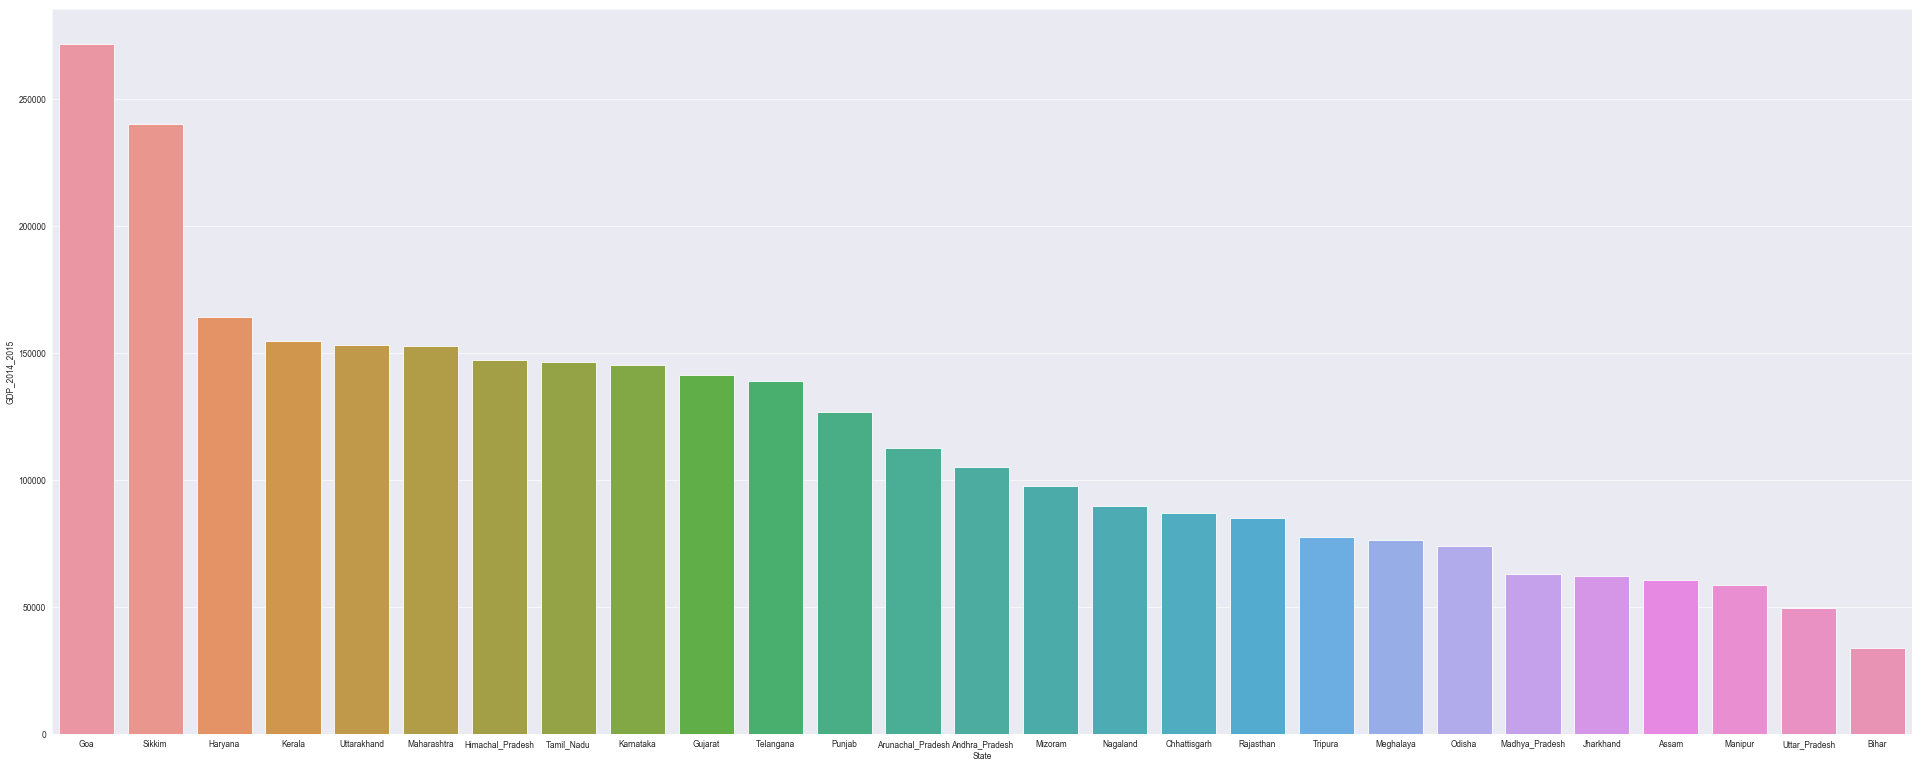

In [496]:
import seaborn as sea
from matplotlib import pyplot as plt

plt.figure(num = None, figsize = (40,16), dpi = 60, facecolor = 'w', edgecolor='k')


states = list(result.State.unique())

#Cutting and Slicing to get the statewise percapita 
df_gdp = result[result.Item == 'Per Capita GSDP (Rs.)']
df_gdp.columns
gdp_state_wise = df_gdp[['State','2014-15']]
gdp_state_wise.columns= ['State','GDP_2014_2015']
gdp_state_wise = gdp_state_wise[(gdp_state_wise['State']!='Delhi') & (gdp_state_wise['State']!='Chandigarh')&(gdp_state_wise['State']!='Puducherry')]
gdp_state_wise = gdp_state_wise.sort_values('GDP_2014_2015',ascending = False)
sea.barplot(x = 'State', y = 'GDP_2014_2015', data = gdp_state_wise)
#gdp_state_wise
print("\n\n")
print("Top and Bottom 5 are: -")
print(gdp_state_wise[:5])
print("\n\n")
print(gdp_state_wise[-5:])

print("\n\n\n")
print("Ratio of highest to lowest is ")
print(int(gdp_state_wise['GDP_2014_2015'].iloc[0])/int(gdp_state_wise['GDP_2014_2015'].iloc[-1]))

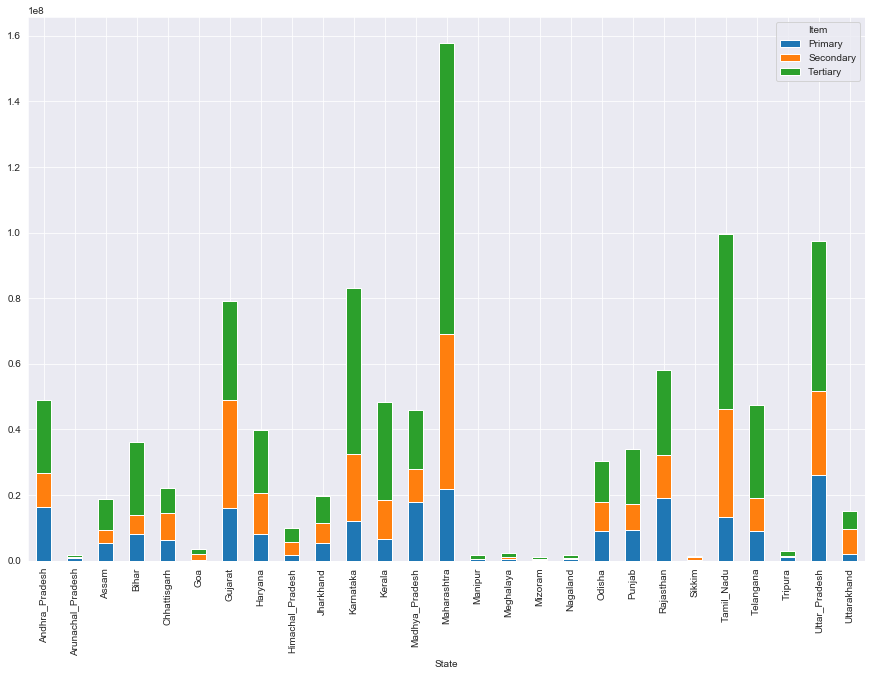

In [487]:
#colors = ["#006D2C", "#31A354","#74C476"]
sector_wise_division = result[(result['Item']=='Primary') | (result['Item'] == 'Secondary') | (result['Item'] == 'Tertiary')]
pivot_df = sector_wise_division.pivot(index='State', columns='Item', values='2014-15')
#pivot_df
pivot_df.plot.bar(stacked=True, figsize=(15,10))



In [488]:
#Removing unwanted rows - cleaning
exclude = ['Tertiary','TOTAL GSVA at basic prices',
'Taxes on Products',
'Subsidies on products',
'Gross State Domestic Product',
"Population ('00)",
'Secondary',
'Primary',
]
sub_sector_data = result[result['Item'].isin(exclude) == False]
df_gdp = result[result.Item == 'Per Capita GSDP (Rs.)']
df_gdp = df_gdp[['2014-15','State']]
df_gdp.sort_values(by = '2014-15')

#Pivoting the dataframe to get the data in desired format
pivot_df = pd.DataFrame(sub_sector_data.pivot(index='State', columns='Item', values='2014-15'))
pivot_df['Sector'] = 'C4'
pivot_df['Sector'][pivot_df['Per Capita GSDP (Rs.)'].quantile(0.2) < pivot_df['Per Capita GSDP (Rs.)']] = "C3"
pivot_df['Sector'][pivot_df['Per Capita GSDP (Rs.)'].quantile(0.5) < pivot_df['Per Capita GSDP (Rs.)']] = "C2"
pivot_df['Sector'][pivot_df['Per Capita GSDP (Rs.)'].quantile(0.85) < pivot_df['Per Capita GSDP (Rs.)']] = "C1"
#Dropping the per capita column as its not required
pivot_df.drop(['Per Capita GSDP (Rs.)'], axis=1)
#pivot_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Item,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Hotels & restaurants,...,Road transport**,Services incidental to transport,Services incidental to transport*,Storage,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,Sector
State,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,14819416.0,14900.0,928756.0,4664889.0,7893514.0,1151729.0,1900863.0,2270664.0,346160.0,517400.0,...,NaN,780200.0,NaN,18700.0,3716000.0,NaN,4233400.0,5076984.0,94200.0,C3
Arunachal_Pradesh,686117.0,0.0,19568.0,147842.0,415520.0,113527.0,25207.0,8193.0,224017.0,3625.0,...,NaN,109.0,NaN,0.0,56796.0,NaN,60421.0,35203.0,0.0,C2
Assam,3855548.0,26223.0,357619.0,1733568.0,2890544.0,296587.0,543651.0,529539.0,261987.0,110904.0,...,NaN,35739.0,NaN,10308.0,2876251.0,NaN,2987155.0,1194568.0,4502.0,C4
Bihar,7951890.0,13599.0,919427.0,3449763.0,4688237.0,345168.0,1178022.0,653224.0,550132.0,366982.0,...,NaN,166600.0,NaN,10618.0,7081391.0,NaN,7448373.0,3147173.0,2228.0,C4
Chhattisgarh,3948847.0,9507.0,294552.0,2669855.0,2613371.0,1198438.0,739057.0,385483.0,597785.0,121407.0,...,NaN,5232.0,NaN,16675.0,1414164.0,NaN,1535571.0,871770.0,0.0,C3
Goa,308507.0,46359.0,44028.0,165819.0,140421.0,204110.0,233618.0,122201.0,15744.0,37434.0,...,NaN,19272.0,NaN,357.0,343492.0,NaN,380927.0,189656.0,17820.0,C1
Gujarat,13769969.0,NaN,1242520.0,5526017.0,9671086.0,3409983.0,4606644.0,638357.0,761616.0,NaN,...,NaN,NaN,2744163.0,57634.0,10178713.0,NaN,10178713.0,4555910.0,NaN,C2
Haryana,8015238.0,NaN,479658.0,3702571.0,4636731.0,1101919.0,1671486.0,110080.0,352254.0,168535.0,...,NaN,190269.0,NaN,14459.0,4817784.0,NaN,4986319.0,2560623.0,NaN,C1
Himachal_Pradesh,1514981.0,3979.0,194266.0,808256.0,853758.0,767268.0,362521.0,9968.0,540950.0,121333.0,...,NaN,1724.0,NaN,129.0,494162.0,NaN,615496.0,552234.0,0.0,C2


In [467]:
#from itertools import cycle, islice
#sub_sector = pivot_df.groupby('Sector').sum()
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, sub_sector.shape[1]))
#sub_sector.plot.bar(stacked=True, figsize=(15,10))
#print(my_colors)
#sub_sector

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

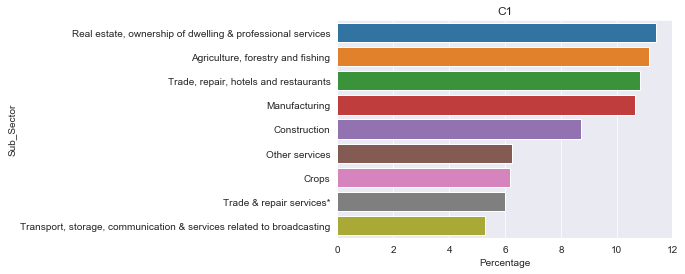

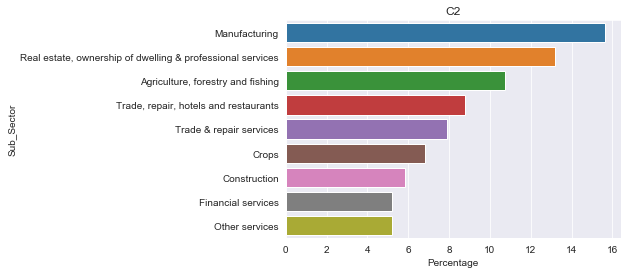

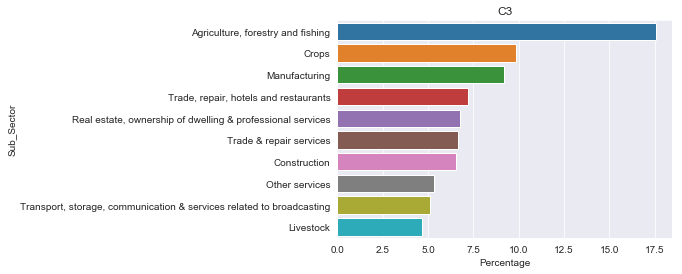

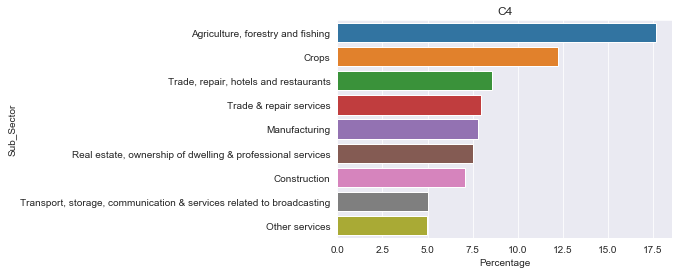

In [489]:
#Performing aggregations and obtaining the sum across different sub sectors 
sub_sector = pivot_df.groupby('Sector').sum()
sub_sector = pd.DataFrame(sub_sector.transpose())
sub_sector['Sub_Sector'] = sub_sector.index
sub_sector_c1 = sub_sector[['Sub_Sector','C1']].sort_values('C1',ascending = False)
sub_sector_c2 = sub_sector[['Sub_Sector','C2']].sort_values('C2',ascending = False)
sub_sector_c3 = sub_sector[['Sub_Sector','C3']].sort_values('C3',ascending = False)
sub_sector_c4 = sub_sector[['Sub_Sector','C4']].sort_values('C4',ascending = False)
sub_sector_c1['Cumulative'] = sub_sector_c1['C1'].cumsum()
sub_sector_c2['Cumulative'] = sub_sector_c2['C2'].cumsum()
sub_sector_c3['Cumulative'] = sub_sector_c3['C3'].cumsum()
sub_sector_c4['Cumulative'] = sub_sector_c4['C4'].cumsum()
sub_sector_c1['Percentage'] = (sub_sector_c1['C1']*100)/(sub_sector_c1['C1'].sum())
sub_sector_c2['Percentage'] = (sub_sector_c2['C2']*100)/(sub_sector_c2['C2'].sum())
sub_sector_c3['Percentage'] = (sub_sector_c3['C3']*100)/(sub_sector_c3['C3'].sum())
sub_sector_c4['Percentage'] = (sub_sector_c4['C4']*100)/(sub_sector_c4['C4'].sum())
sub_sector_c2[sub_sector_c2['Cumulative']<sub_sector_c2['C2'].sum()*.8]

#plotting the obtained values

plt.figure(1)
plt.title('C1')
plt.subplot(1,1,1)
sea.barplot(y = 'Sub_Sector', x = 'Percentage', data = sub_sector_c1[sub_sector_c1['Cumulative']<sub_sector_c1['C1'].sum()*.8])
plt.figure(2)
plt.title('C2')
plt.subplot(1,1,1)
sea.barplot(y = 'Sub_Sector', x = 'Percentage', data = sub_sector_c2[sub_sector_c2['Cumulative']<sub_sector_c2['C2'].sum()*.8])
plt.figure(3)
plt.title('C3')
plt.subplot(1,1,1)
sea.barplot(y = 'Sub_Sector', x = 'Percentage', data = sub_sector_c3[sub_sector_c3['Cumulative']<sub_sector_c3['C3'].sum()*.8])
plt.figure(4)
plt.title('C4')
plt.subplot(1,1,1)
sea.barplot(y = 'Sub_Sector', x = 'Percentage', data = sub_sector_c4[sub_sector_c4['Cumulative']<sub_sector_c4['C4'].sum()*.8])


[{'Primary - 2014-2015': -0.44465302864172834},
 {'Primary - 2014-2015.1': -0.5643811157699384},
 {'Upper Primary - 2014-2015': -0.5569725922088535},
 {'Secondary - 2014-2015': -0.5242114901129451},
 {'Senior Secondary - 2014-2015': 0.4744210063238454}]

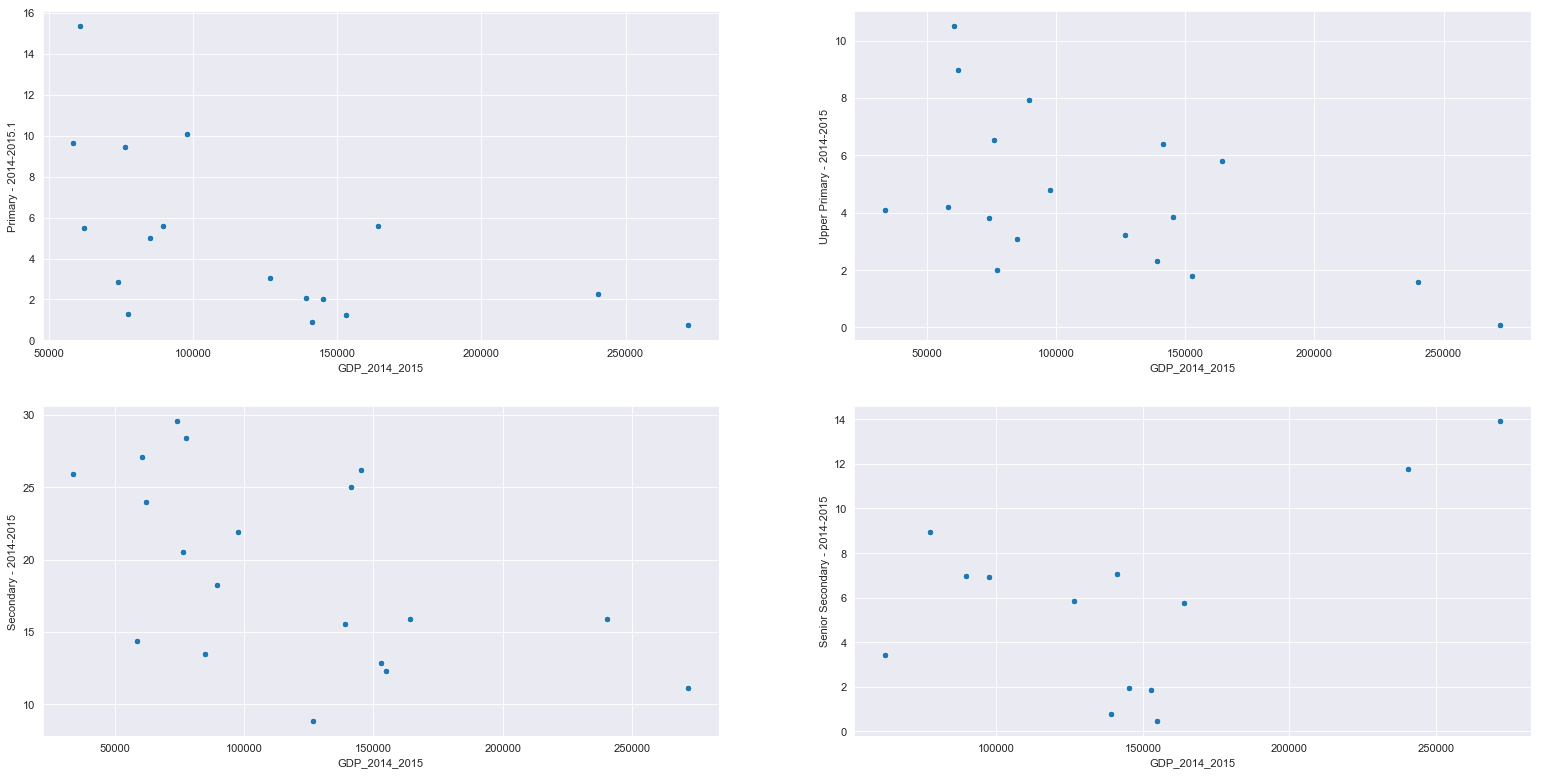

<Figure size 432x288 with 0 Axes>

In [490]:
#Reading the data
drop_out_csv = pd.read_csv('C://Users//Librarian//GitHub//Upgrad//Data-Science//Projects//GDP_Analysis/Data II.csv')
drop_out_csv.columns
#gdp_state_wise
drop_out_csv = drop_out_csv[['Sl. No.', 'Level of Education - State',
       'Primary - 2014-2015', 'Primary - 2014-2015.1',
       'Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]
drop_out_csv.columns = ['Sl. No.', 'State',
       'Primary - 2014-2015', 'Primary - 2014-2015.1',
       'Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']

#Doing an inner join since we only want states
correlation_set = pd.merge(gdp_state_wise, drop_out_csv, how='left', on = 'State')
correlation_set
#Plotting the scatter plot to check for correlation

#help(sea.scatterplot)
plt.figure(num = None, figsize = (24,12), dpi = 80, facecolor = 'w', edgecolor='k')
plt.figure(1)
plt.subplot(2,2,1)
sea.scatterplot(x = 'GDP_2014_2015',y = 'Primary - 2014-2015.1', data = correlation_set)
plt.subplot(2,2,2)
sea.scatterplot(x = 'GDP_2014_2015',y = 'Upper Primary - 2014-2015', data = correlation_set)
plt.subplot(2,2,3)
sea.scatterplot(x = 'GDP_2014_2015',y = 'Secondary - 2014-2015', data = correlation_set)
plt.subplot(2,2,4)
sea.scatterplot(x = 'GDP_2014_2015',y = 'Senior Secondary - 2014-2015', data = correlation_set)

plt.figure(2)
#Finding the correlation constant in each case
[{x:correlation_set[x].corr(correlation_set['GDP_2014_2015'])} for x in correlation_set.columns[3:]]